In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Análisis exploratorio de los datos de vertimento diarios**

In [2]:
# descarga de los vertmentos diarias desde el 2000 hasta 2019
temp_vertimento_diario = pd.DataFrame({'Fecha' : []})
for year in range(2000,2020):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Vertimentos/Vertimentos_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    new_data.columns = ['Fecha', 'Region Hidrologica', 'Nombre Embalse','Vertimientos Volumen miles m3', 'Vertimientos Energía kWh']
    #pd.concat([df1, df4], ignore_index=True, sort=False)
    temp_vertimento_diario = pd.concat([temp_vertimento_diario, new_data])
temp_vertimento_diario['Vertimiento Energía gWh'] = temp_vertimento_diario['Vertimientos Energía kWh']/1000000

In [4]:
# descarga de los vertmentos diarias desde el 2020 hasta 2022
temp_vertimento_diario_2 = pd.DataFrame({'Fecha' : []})
for year in range(2020,2022):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Vertimentos_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    new_data.columns = ['Fecha', 'Region Hidrologica', 'Nombre Embalse','Vertimientos Volumen miles m3', 'Vertimientos Energía kWh']
    #pd.concat([df1, df4], ignore_index=True, sort=False)
    temp_vertimento_diario_2 = pd.concat([temp_vertimento_diario_2, new_data])
temp_vertimento_diario_2['Vertimiento Energía gWh'] = temp_vertimento_diario_2['Vertimientos Energía kWh']/1000000

In [5]:
df_vert = pd.concat([temp_vertimento_diario,temp_vertimento_diario_2])

In [6]:
df_vert['Fecha'] = pd.to_datetime(df_vert['Fecha'])
# creando las columnas dias, meses y años
df_vert['Year'] = df_vert['Fecha'].dt.year.astype(object)
df_vert['Month'] = df_vert['Fecha'].dt.month_name()
df_vert['Weekday Name'] = df_vert['Fecha'].dt.day_name()

In [7]:
df_vert.tail(2)

,Fecha,Region Hidrologica,Nombre Embalse,Vertimientos Volumen miles m3,Vertimientos Energía kWh,Vertimiento Energía gWh,Year,Month,Weekday Name
761,2021-08-31,CENTRO,EL QUIMBO,16550.10,4952157.70,4.952158,2021,August,Tuesday
762,2021-08-31,ORIENTE,GUAVIO,5959.44,16263642.84,16.263643,2021,August,Tuesday


In [8]:
df_vert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12018 entries, 0 to 762
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha                          12018 non-null  datetime64[ns]
 1   Region Hidrologica             12018 non-null  object        
 2   Nombre Embalse                 12018 non-null  object        
 3   Vertimientos Volumen miles m3  12012 non-null  float64       
 4   Vertimientos Energía kWh       11845 non-null  float64       
 5   Vertimiento Energía gWh        11845 non-null  float64       
 6   Year                           12018 non-null  object        
 7   Month                          12018 non-null  object        
 8   Weekday Name                   12018 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 938.9+ KB


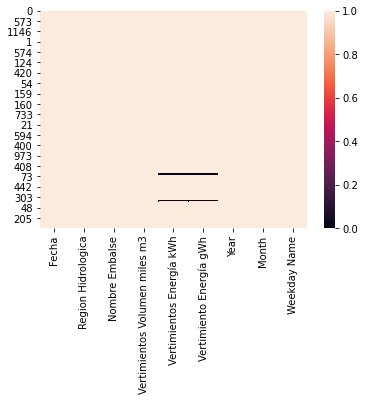

In [9]:
sns.heatmap(df_vert.notna())

In [10]:
df_vert.isnull().sum()

Fecha                              0
Region Hidrologica                 0
Nombre Embalse                     0
Vertimientos Volumen miles m3      6
Vertimientos Energía kWh         173
Vertimiento Energía gWh          173
Year                               0
Month                              0
Weekday Name                       0
dtype: int64

In [11]:
df_vert.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Fecha,Region Hidrologica,Nombre Embalse,Vertimientos Volumen miles m3,Vertimientos Energía kWh,Vertimiento Energía gWh,Year,Month,Weekday Name
count,12018,12018,12018,12012.000000,1.184500e+04,11845.000000,12018.0,12018,12018
unique,4993,5,22,NaN,NaN,NaN,22.0,12,7
top,2021-06-25 00:00:00,ANTIOQUIA,PLAYAS,NaN,NaN,NaN,2000.0,June,Tuesday
freq,10,7955,3029,NaN,NaN,NaN,1718.0,1532,1746
first,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5027.152669,4.885768e+06,4.885768,NaN,NaN,NaN
std,NaN,NaN,NaN,8886.704119,7.912270e+06,7.912270,NaN,NaN,NaN
min,NaN,NaN,NaN,0.003000,4.542250e+00,0.000005,NaN,NaN,NaN
25%,NaN,NaN,NaN,598.131000,5.134368e+05,0.513437,NaN,NaN,NaN


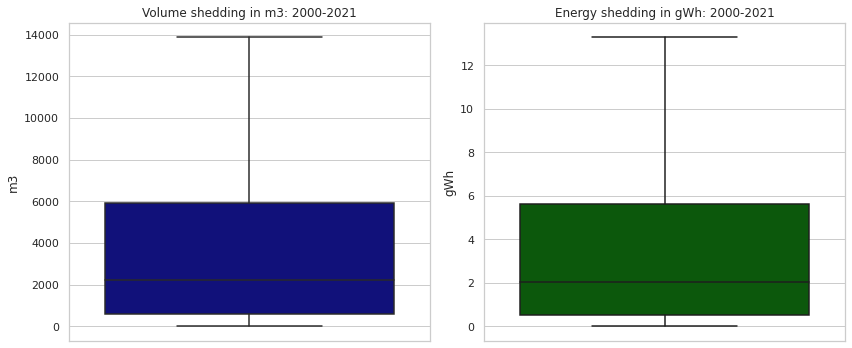

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,5))
plt.subplot(121)

sns.boxplot(data=df_vert, y='Vertimientos Volumen miles m3',color="darkblue", showfliers=False)
plt.ylabel('m3')
plt.title("Volume shedding in m3: 2000-2021")

plt.subplot(122)
sns.boxplot(data=df_vert, y='Vertimiento Energía gWh',color="darkgreen", showfliers=False)
plt.ylabel('gWh')
plt.title("Energy shedding in gWh: 2000-2021")
plt.tight_layout()

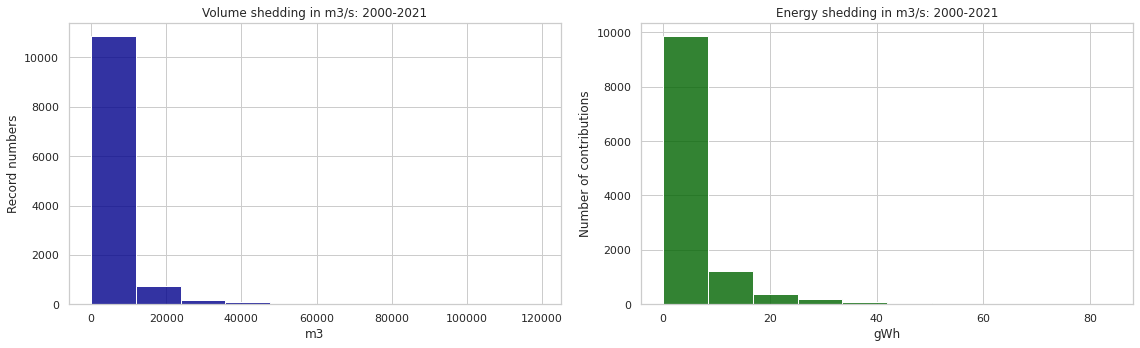

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(16,5))
plt.subplot(121)

sns.histplot(data=df_vert, x='Vertimientos Volumen miles m3',bins=10,color="darkblue",alpha=0.8)
plt.xlabel('m3')
plt.ylabel('Record numbers')
plt.title("Volume shedding in m3/s: 2000-2021")

plt.subplot(122)
sns.histplot(data=df_vert, x='Vertimiento Energía gWh',bins=10, color="darkgreen",alpha=0.8)
plt.xlabel('gWh')
plt.ylabel('Number of contributions')
plt.title("Energy shedding in m3/s: 2000-2021")

plt.tight_layout()

Text(0.5, 0, 'Hydrological region')

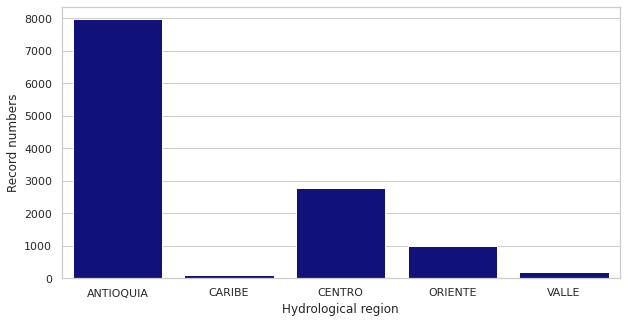

In [14]:
df_vh = df_vert.groupby(['Region Hidrologica']).size()
df_vh = df_vh.reset_index()
df_vh.columns = ['Region Hidrologica','Record numbers']

# Gráfica
plt.subplots(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='Region Hidrologica', y='Record numbers', data = df_vh,color="darkblue")
plt.xlabel('Hydrological region')
# plt.title("Number of contributions by Hydrological Region from 2000 to 2021")

Text(0, 0.5, 'Damming')

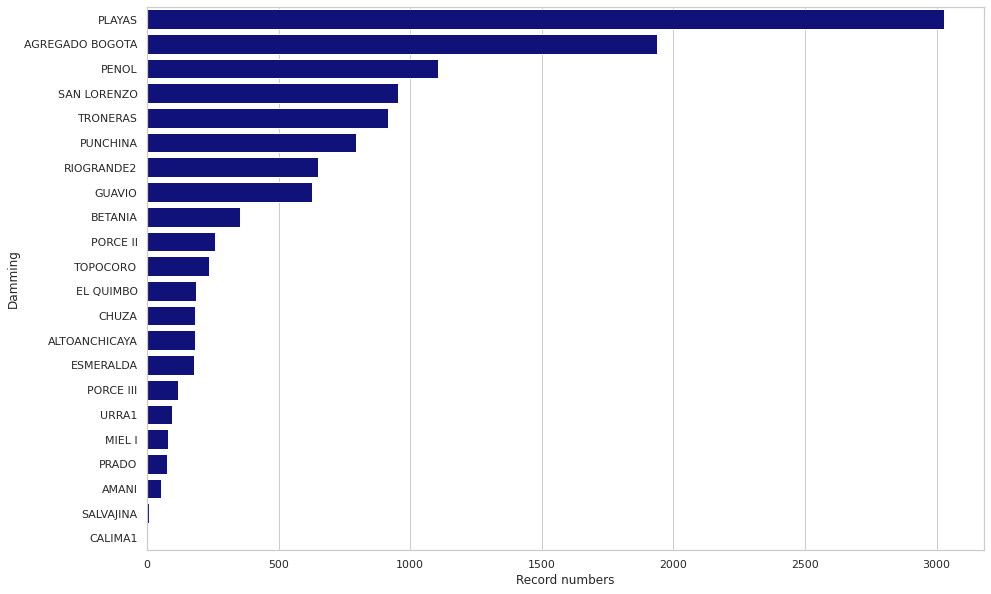

In [15]:
df_vh = df_vert.groupby(['Nombre Embalse']).size().sort_values(ascending=False)
df_vh = df_vh.reset_index()
df_vh.columns = ['Nombre Embalse','Record numbers']

# Gráfica
plt.subplots(figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.barplot(x='Record numbers', y='Nombre Embalse', data = df_vh,color="darkblue")
plt.ylabel('Damming')
#plt.title("Number of contributions per river from 2000 to 2021")

In [17]:
# Vertimiento en volumen según región hidrologica desde 2000 hasta 2021
df_by_day_vv = df_vert.groupby(by=['Fecha','Region Hidrologica']).sum().reset_index()
df_temp_rg_vv = df_by_day_vv.groupby(['Region Hidrologica'])['Vertimientos Volumen miles m3'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_vv

,Region Hidrologica,count,sum,mean,std,min,median,max
0,ANTIOQUIA,3737,2.934608e+07,7852.843525,9509.609166,0.00,4331.750,80867.03
1,CENTRO,2510,2.219529e+07,8842.744886,17265.135337,0.26,1318.030,141941.99
2,ORIENTE,857,6.370096e+06,7433.017954,8699.978513,0.01,4730.400,61528.03
3,CARIBE,94,1.734432e+06,18451.404787,22898.727347,5.84,7959.035,111668.42
4,VALLE,193,7.402635e+05,3835.562192,7277.330832,2.05,2563.420,96390.00


In [18]:
# Vertimiento en volumen según nombre del embalse desde 2000 hasta 2021
df_by_day_ne = df_vert.groupby(by=['Fecha','Nombre Embalse']).sum().reset_index()
df_temp_ne_vv = df_by_day_ne.groupby(['Nombre Embalse'])['Vertimientos Volumen miles m3'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_ne_vv.head(5)

,Nombre Embalse,count,sum,mean,std,min,median,max
0,PLAYAS,3029,1.387837e+07,4581.833157,4191.258673,0.000,3515.8750,61320.000
1,BETANIA,352,1.028524e+07,29219.440653,22067.718925,2.700,26155.3800,119106.100
2,TOPOCORO,234,6.883782e+06,29417.872637,21326.292064,102.208,24788.6405,110753.964
3,GUAVIO,628,4.556561e+06,7255.670500,5919.260583,69.980,5982.0850,30766.356
4,PUNCHINA,793,3.798606e+06,4790.171108,4171.392830,0.000,3910.7520,22924.224


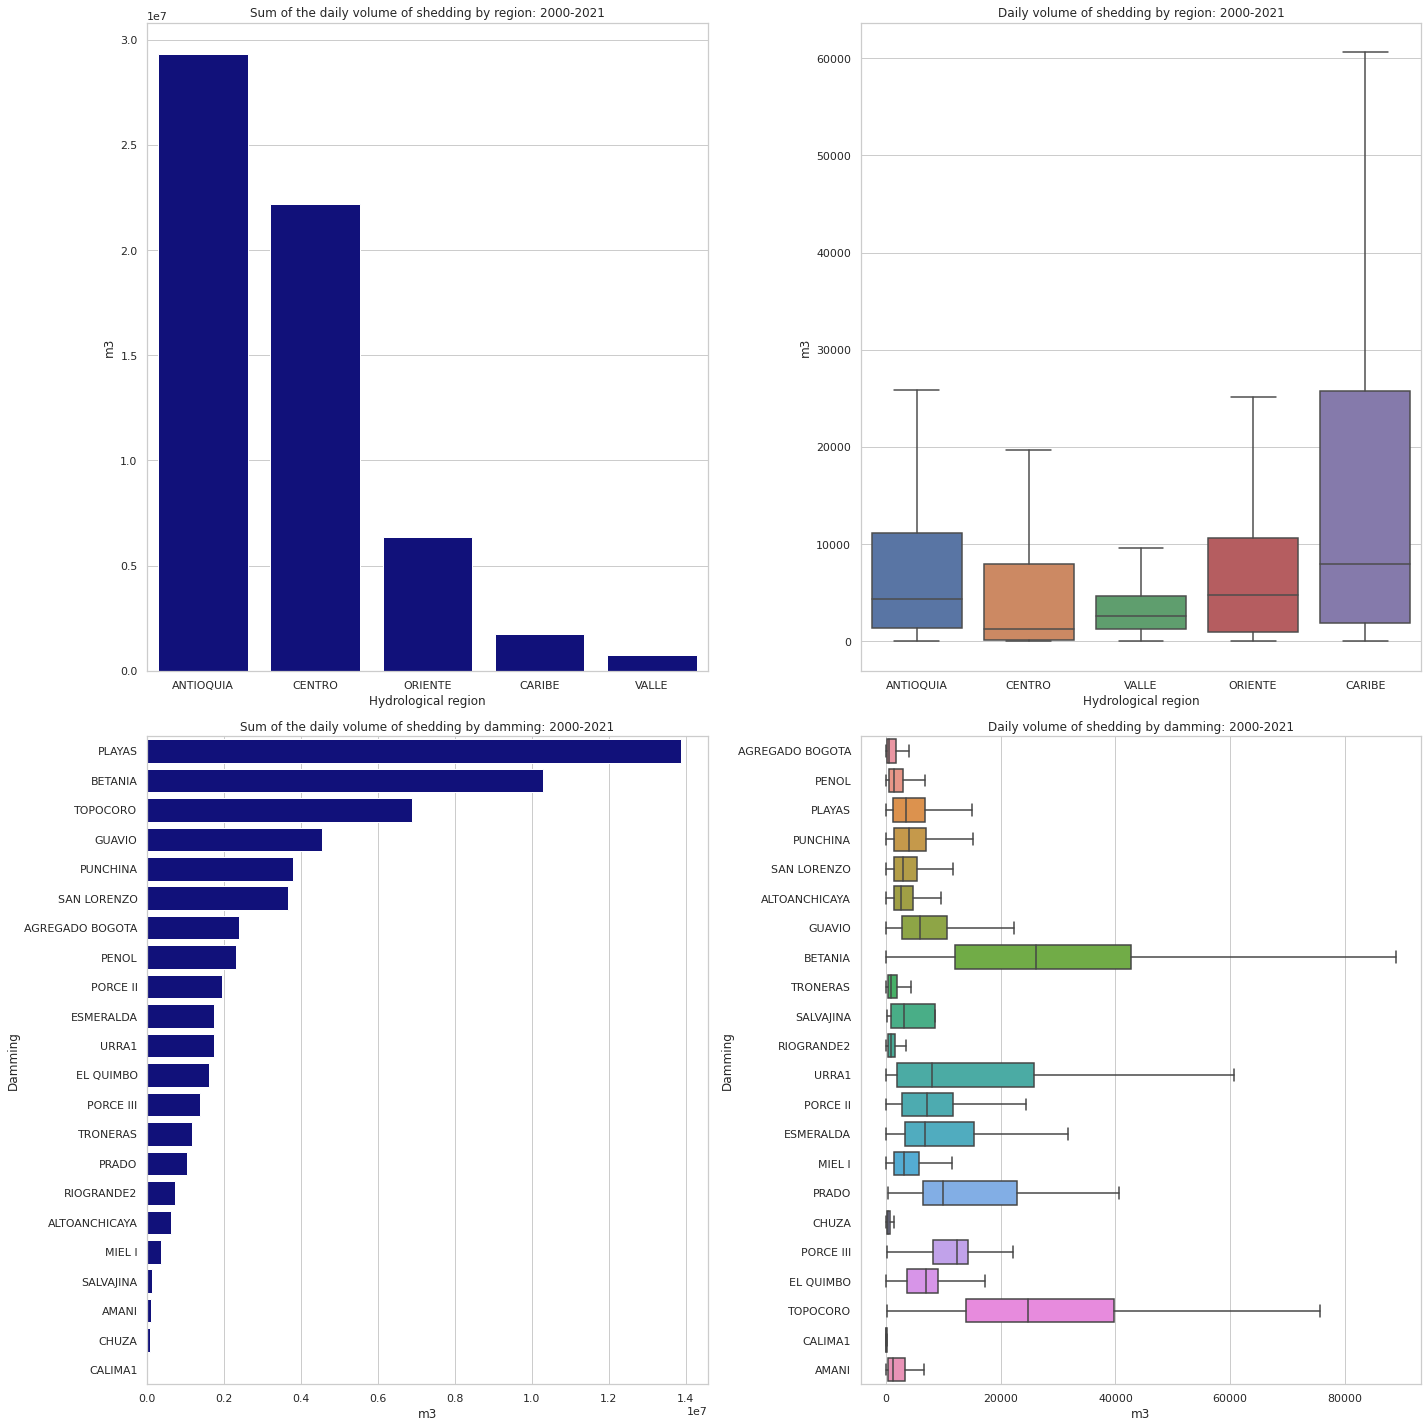

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,20))

plt.subplot(221)

sns.barplot(x='Region Hidrologica', y='sum', data = df_temp_rg_vv,color="darkblue")
plt.ylabel('m3')
plt.xlabel('Hydrological region')
plt.title("Sum of the daily volume of shedding by region: 2000-2021")

plt.subplot(222)
sns.boxplot(x='Region Hidrologica', y='Vertimientos Volumen miles m3', data = df_by_day_vv,showfliers=False)
plt.ylabel('m3')
plt.xlabel('Hydrological region')
plt.title("Daily volume of shedding by region: 2000-2021")

plt.subplot(223)
sns.barplot(x='sum', y='Nombre Embalse', data = df_temp_ne_vv,color="darkblue")
plt.xlabel('m3')
plt.ylabel('Damming')
plt.title("Sum of the daily volume of shedding by damming: 2000-2021")

plt.subplot(224)
sns.boxplot(x='Vertimientos Volumen miles m3',y='Nombre Embalse',  data = df_by_day_ne,showfliers=False)
plt.xlabel('m3')
plt.ylabel('Damming')
plt.title("Daily volume of shedding by damming: 2000-2021")

plt.tight_layout()

In [21]:
# vertimiento en energia según región hidrologica desde 2000 hasta 2021
df_by_day_rg = df_vert.groupby(by=['Fecha','Region Hidrologica']).sum().reset_index()
df_temp_rg_ve = df_by_day_rg.groupby(['Region Hidrologica'])['Vertimiento Energía gWh'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_ve

,Region Hidrologica,count,sum,mean,std,min,median,max
0,ANTIOQUIA,3737,28210.612531,7.549000,11.441632,0.000041,2.710044,77.835840
1,ORIENTE,857,15831.519484,18.473185,20.696278,0.000000,12.548256,136.719010
2,CENTRO,2510,12941.328271,5.155908,7.755766,0.000468,1.794035,55.176028
3,VALLE,193,668.326432,3.462831,3.258689,0.001062,2.489592,23.545935
4,CARIBE,94,220.130147,2.341810,2.940631,0.000711,0.983825,14.557219


In [22]:
# vertimiento en energia según nombre del rio desde 2000 hasta 2021
# df_by_day_ne = df_vert.groupby(by=['Fecha','Nombre Embalse']).sum().reset_index()
df_temp_ne_ve = df_by_day_ne.groupby(['Nombre Embalse'])['Vertimiento Energía gWh'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_ne_ve.head(5)

,Nombre Embalse,count,sum,mean,std,min,median,max
0,GUAVIO,628,12482.945405,19.877302,16.184247,0.191833,16.251972,83.963095
1,SAN LORENZO,955,9333.398012,9.773192,8.240431,0.006374,7.644585,47.124060
2,AGREGADO BOGOTA,1939,8054.020150,4.153698,7.492257,0.001117,1.030393,50.792976
3,PLAYAS,3029,6187.179752,2.042648,1.854563,0.000041,1.564612,27.050637
4,PUNCHINA,793,5518.584283,6.959123,6.107739,0.000005,5.524557,34.767133


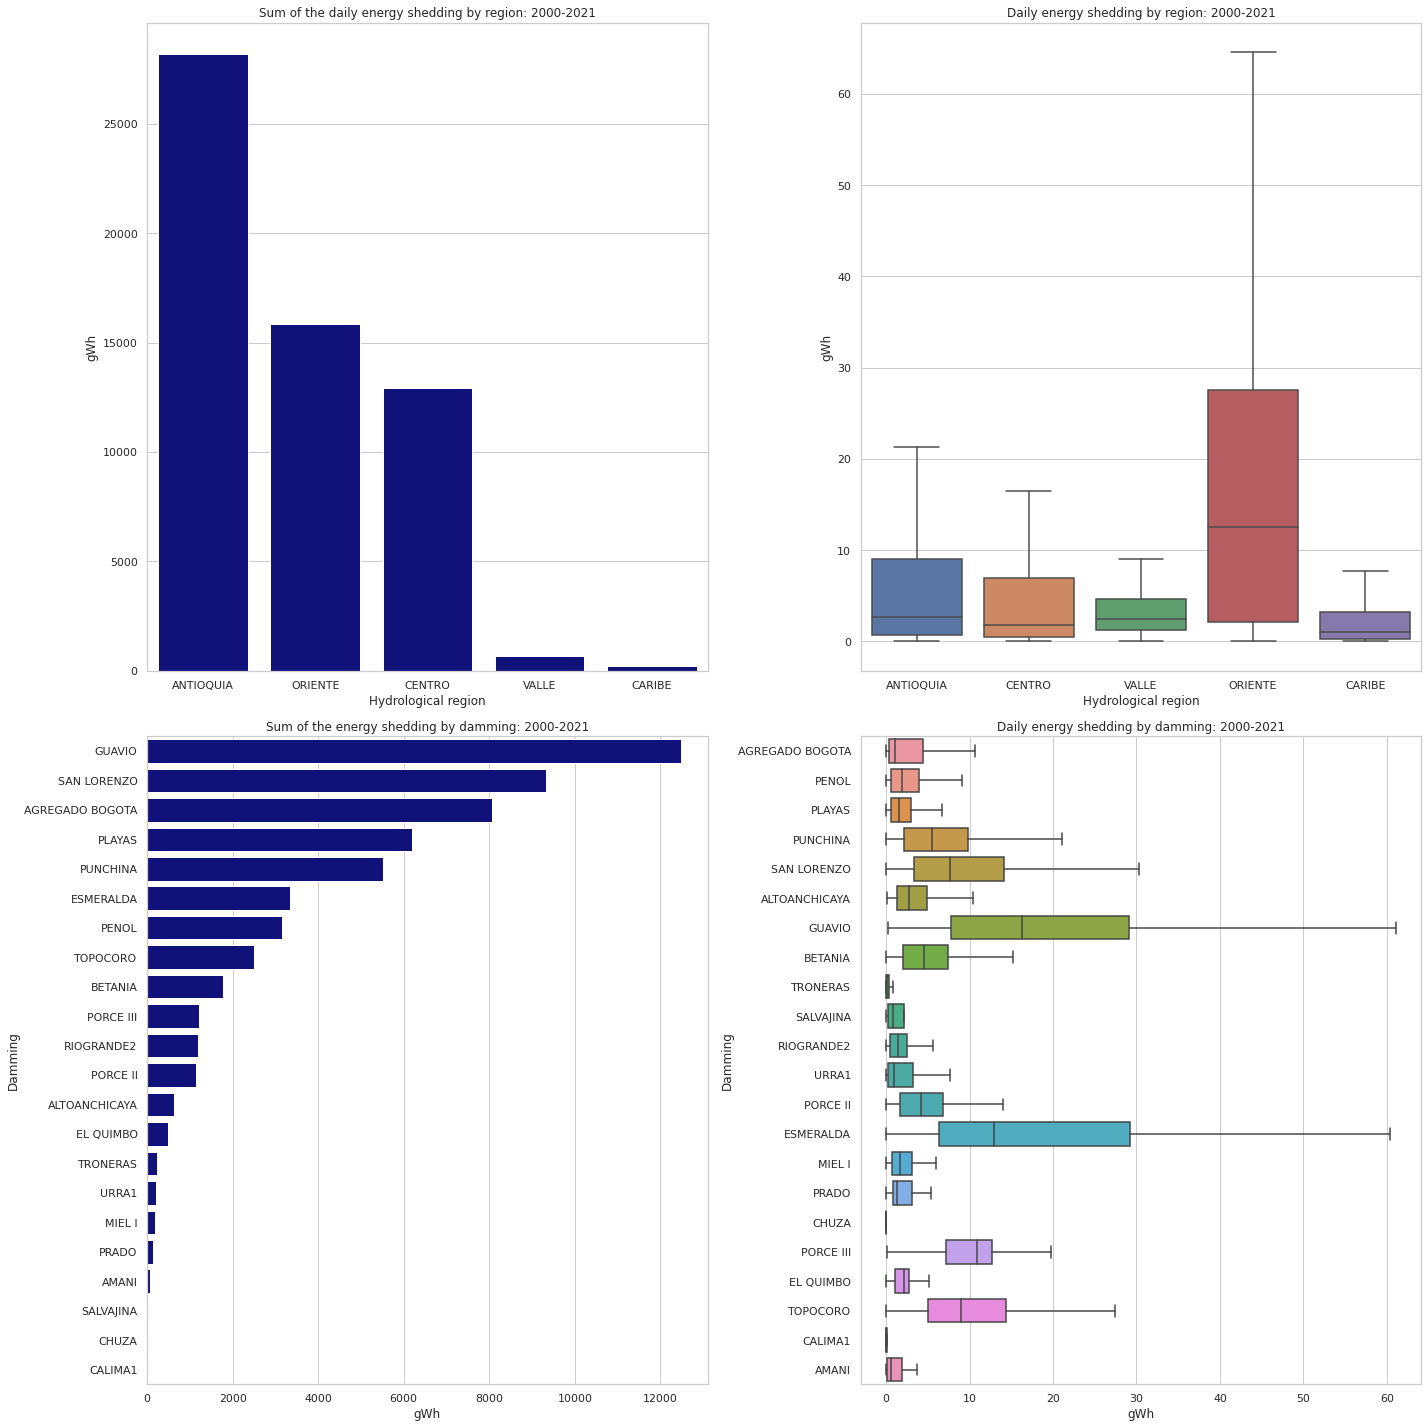

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,20))

plt.subplot(221)

sns.barplot(x='Region Hidrologica', y='sum', data = df_temp_rg_ve,color="darkblue")
plt.ylabel('gWh')
plt.xlabel('Hydrological region')
plt.title("Sum of the daily energy shedding by region: 2000-2021")
#fig.savefig('flowcontribmonth.jpg')

plt.subplot(222)
sns.boxplot(x='Region Hidrologica', y='Vertimiento Energía gWh', data = df_by_day_vv, showfliers=False)
#sns.barplot(x='Region Hidrologica', y='mean', data = r_ac.sort_values(by='mean',ascending = False),color="darkblue")
plt.ylabel('gWh')
plt.xlabel('Hydrological region')
plt.title("Daily energy shedding by region: 2000-2021")

plt.subplot(223)
sns.barplot(x='sum', y='Nombre Embalse', data = df_temp_ne_ve,color="darkblue")
plt.xlabel('gWh')
plt.ylabel('Damming')
plt.title("Sum of the energy shedding by damming: 2000-2021")

plt.subplot(224)
sns.boxplot(x='Vertimiento Energía gWh',y='Nombre Embalse',  data = df_by_day_ne,showfliers=False)
#sns.barplot(x='mean', y='Nombre Río', data = rio_ac.sort_values(by='mean',ascending = False),color="darkblue")
plt.xlabel('gWh')
plt.ylabel('Damming')
plt.title("Daily energy shedding by damming: 2000-2021")

plt.tight_layout()

In [25]:
df_by_day_vv['Fecha'] = pd.to_datetime(df_by_day_vv['Fecha'])
# creando las columnas dias, meses y años
df_by_day_vv['Year'] = df_by_day_vv['Fecha'].dt.year
df_by_day_vv['Month'] = df_by_day_vv['Fecha'].dt.month_name()
df_by_day_vv['Weekday Name'] = df_by_day_vv['Fecha'].dt.day_name()

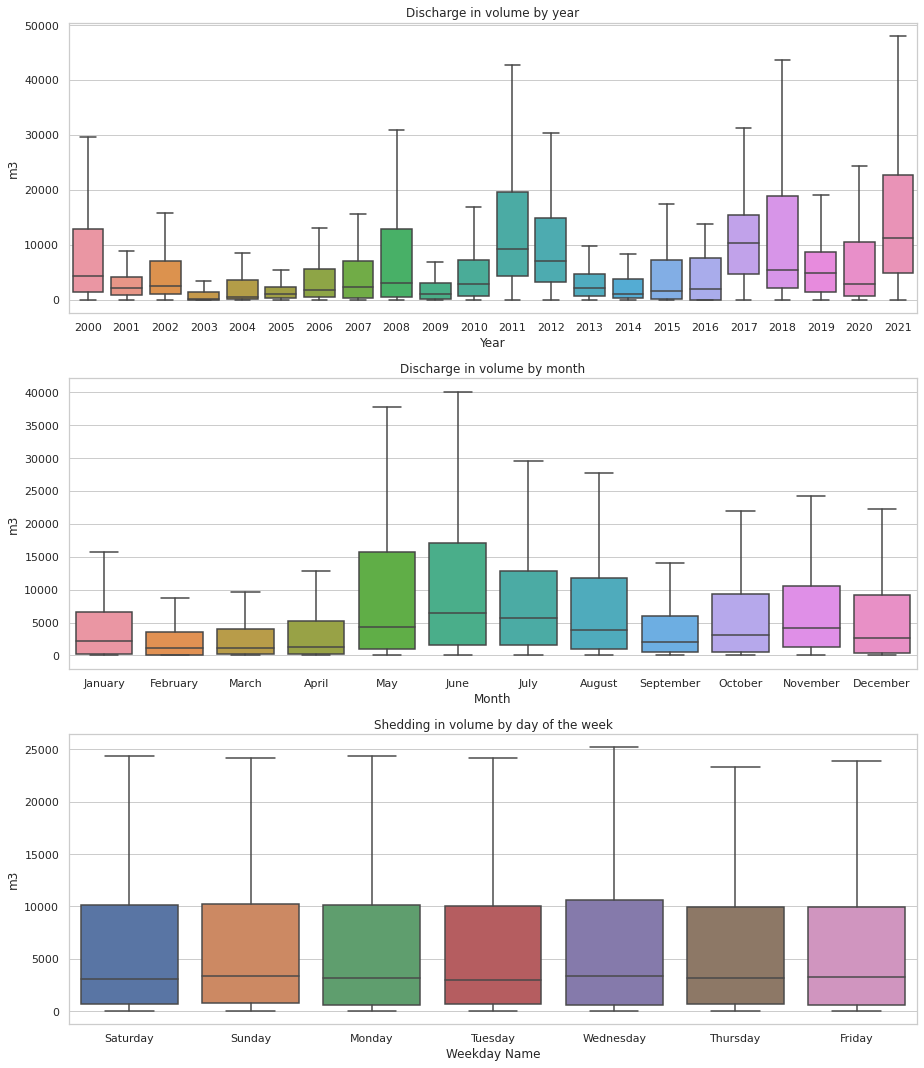

In [27]:
sns.set(style="whitegrid")

plt.subplots(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Vertimientos Volumen miles m3', data = df_by_day_vv,showfliers=False)
#sns.barplot(x="Year", y='Aportes Caudal m3/s' data = df_ap)
plt.ylabel("m3")
plt.title("Discharge in volume by year")
#fig.savefig('Dischargevolume.jpg')

plt.subplot(323)
sns.boxplot(x="Month",y='Vertimientos Volumen miles m3',  data = df_by_day_vv,showfliers=False)
#sns.barplot(x="Month", y='Aportes Caudal m3/s', data = df_ap)
plt.ylabel("m3")
plt.title("Discharge in volume by month")
#fig.savefig('Dischargevolumemonth.jpg')

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Vertimientos Volumen miles m3',  data = df_by_day_vv,showfliers=False)
plt.ylabel("m3")
#sns.barplot(x="Weekday Name", y='Aportes Caudal m3/s', data = df_ap)
plt.title("Shedding in volume by day of the week")

plt.tight_layout()

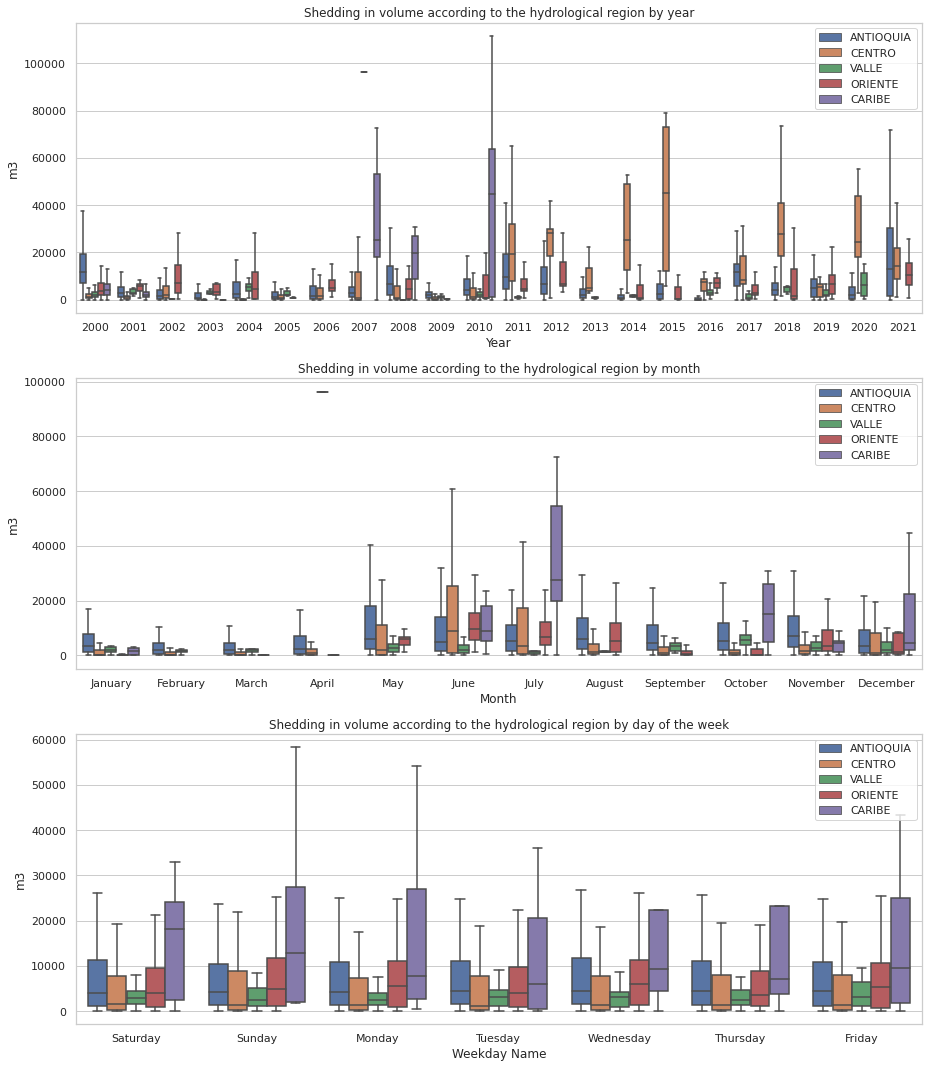

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Vertimientos Volumen miles m3',hue='Region Hidrologica',  data = df_by_day_vv, showfliers=False)
#sns.barplot(x="Year", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("m3")
plt.title("Shedding in volume according to the hydrological region by year")
plt.legend(loc = 'upper right')

plt.subplot(323)
sns.boxplot(x="Month",y='Vertimientos Volumen miles m3',hue='Region Hidrologica',  data = df_by_day_vv, showfliers=False)
#sns.barplot(x="Month", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("m3")
plt.title("Shedding in volume according to the hydrological region by month")
plt.tight_layout()
plt.legend(loc = 'upper right')

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Vertimientos Volumen miles m3',hue='Region Hidrologica',  data = df_by_day_vv,showfliers=False)
#sns.barplot(x="Weekday Name", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("m3")
plt.title("Shedding in volume according to the hydrological region by day of the week")
plt.legend(loc = 'upper right')

plt.tight_layout()

In [29]:
df_by_day_ne['Fecha'] = pd.to_datetime(df_by_day_ne['Fecha'])
# creando las columnas dias, meses y años
df_by_day_ne['Year'] = df_by_day_ne['Fecha'].dt.year
df_by_day_ne['Month'] = df_by_day_ne['Fecha'].dt.month_name()
df_by_day_ne['Weekday Name'] = df_by_day_ne['Fecha'].dt.day_name()

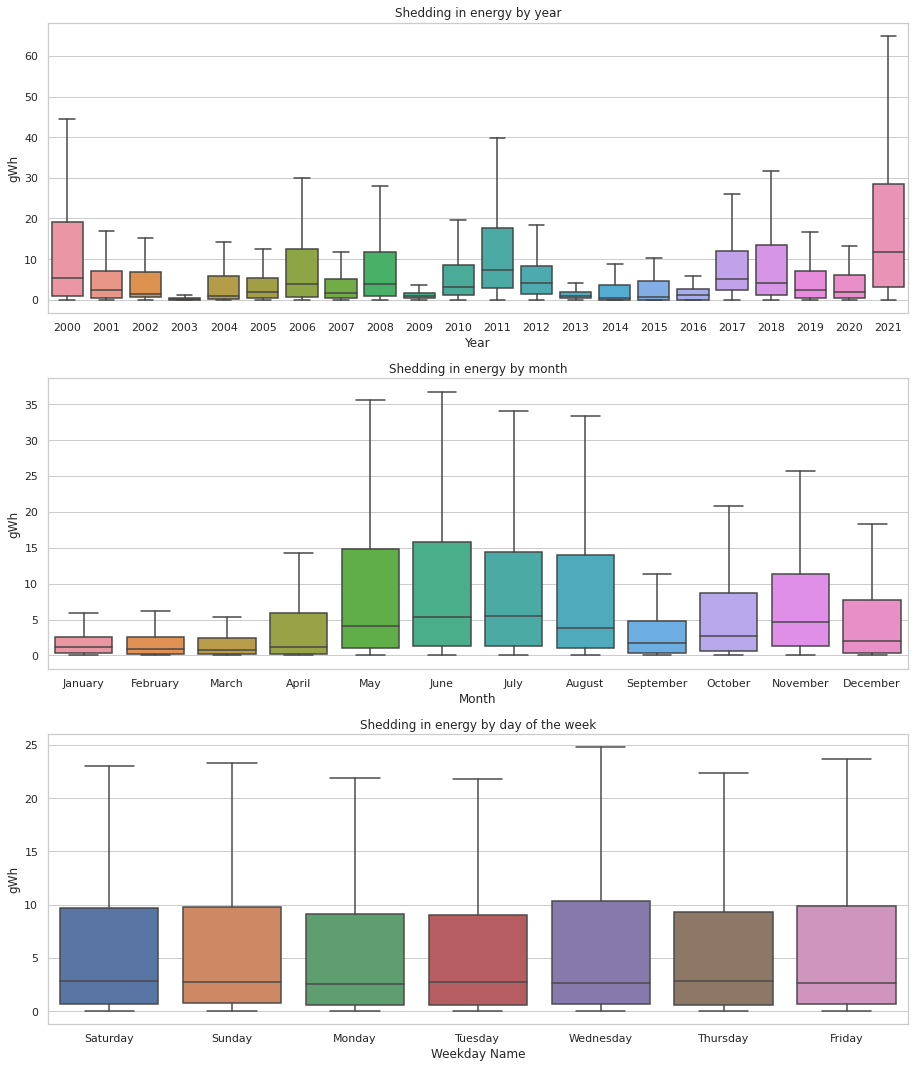

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Vertimiento Energía gWh', data = df_by_day_vv, showfliers=False)
#sns.barplot(x="Year", y='Aportes Caudal m3/s' data = df_ap)
plt.ylabel("gWh")
plt.title("Shedding in energy by year")

plt.subplot(323)
sns.boxplot(x="Month", y='Vertimiento Energía gWh',  data = df_by_day_vv, showfliers=False)
#sns.barplot(x="Month", y='Aportes Caudal m3/s', data = df_ap)
plt.ylabel("gWh")
plt.title("Shedding in energy by month")
plt.tight_layout()

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Vertimiento Energía gWh',  data = df_by_day_vv, showfliers=False)
plt.ylabel("gWh")
#sns.barplot(x="Weekday Name", y='Aportes Caudal m3/s', data = df_ap)
plt.title("Shedding in energy by day of the week")

plt.tight_layout()

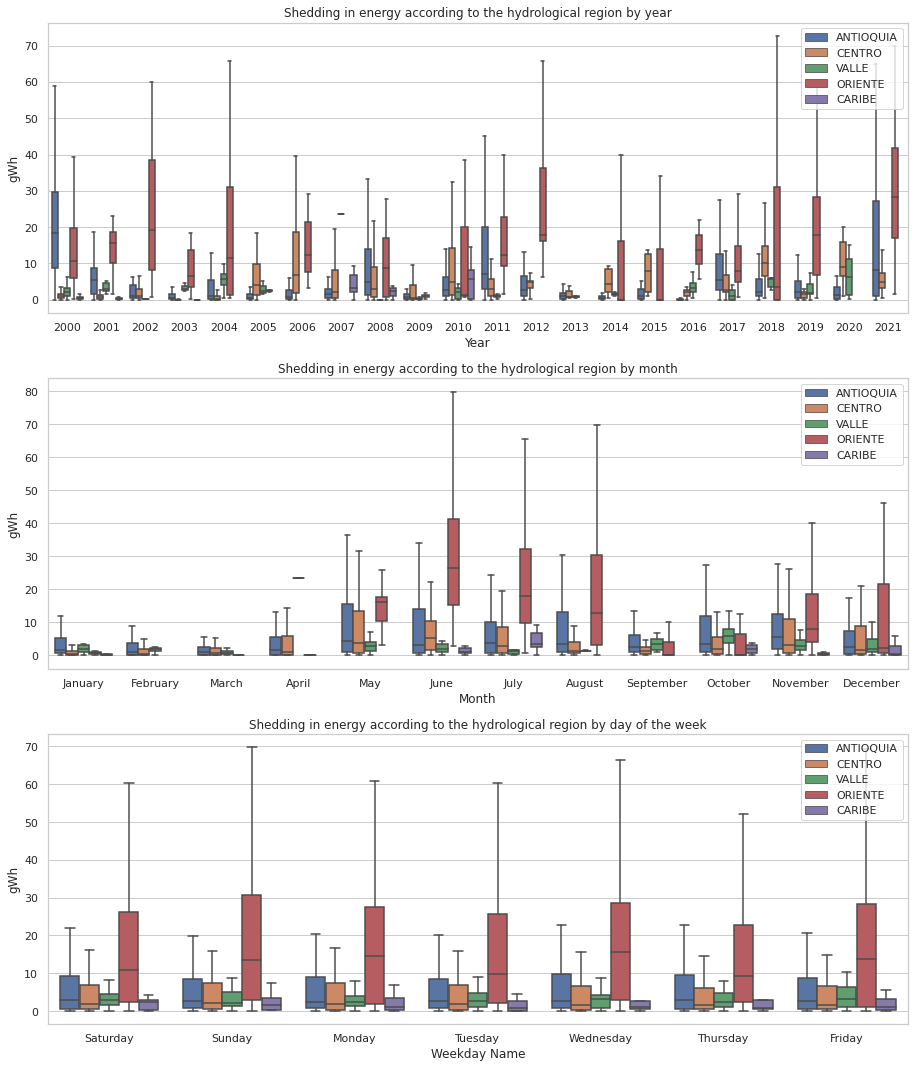

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Vertimiento Energía gWh',hue='Region Hidrologica',  data = df_by_day_vv, showfliers=False)
#sns.barplot(x="Year", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("gWh")
plt.title("Shedding in energy according to the hydrological region by year")
plt.legend(loc = 'upper right')

plt.subplot(323)
sns.boxplot(x="Month",y='Vertimiento Energía gWh',hue='Region Hidrologica',  data = df_by_day_vv, showfliers=False)
#sns.barplot(x="Month", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("gWh")
plt.title("Shedding in energy according to the hydrological region by month")
plt.tight_layout()
plt.legend(loc = 'upper right')

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Vertimiento Energía gWh',hue='Region Hidrologica',  data = df_by_day_vv,showfliers=False)
#sns.barplot(x="Weekday Name", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("gWh")
plt.title("Shedding in energy according to the hydrological region by day of the week")
plt.legend(loc = 'upper right')

plt.tight_layout()

In [32]:
df_y_v = df_by_day_vv.groupby(by=['Year']).sum().reset_index()
df_m_v = df_by_day_vv.groupby(by=['Month']).sum().reset_index()
df_d_v = df_by_day_vv.groupby(by=['Weekday Name']).sum().reset_index()

y_rg_y_v = df_by_day_vv.groupby(by=['Year','Region Hidrologica']).sum().reset_index()
y_rg_m_v = df_by_day_vv.groupby(by=['Month','Region Hidrologica']).sum().reset_index()
y_rg_d_v = df_by_day_vv.groupby(by=['Weekday Name','Region Hidrologica']).sum().reset_index()

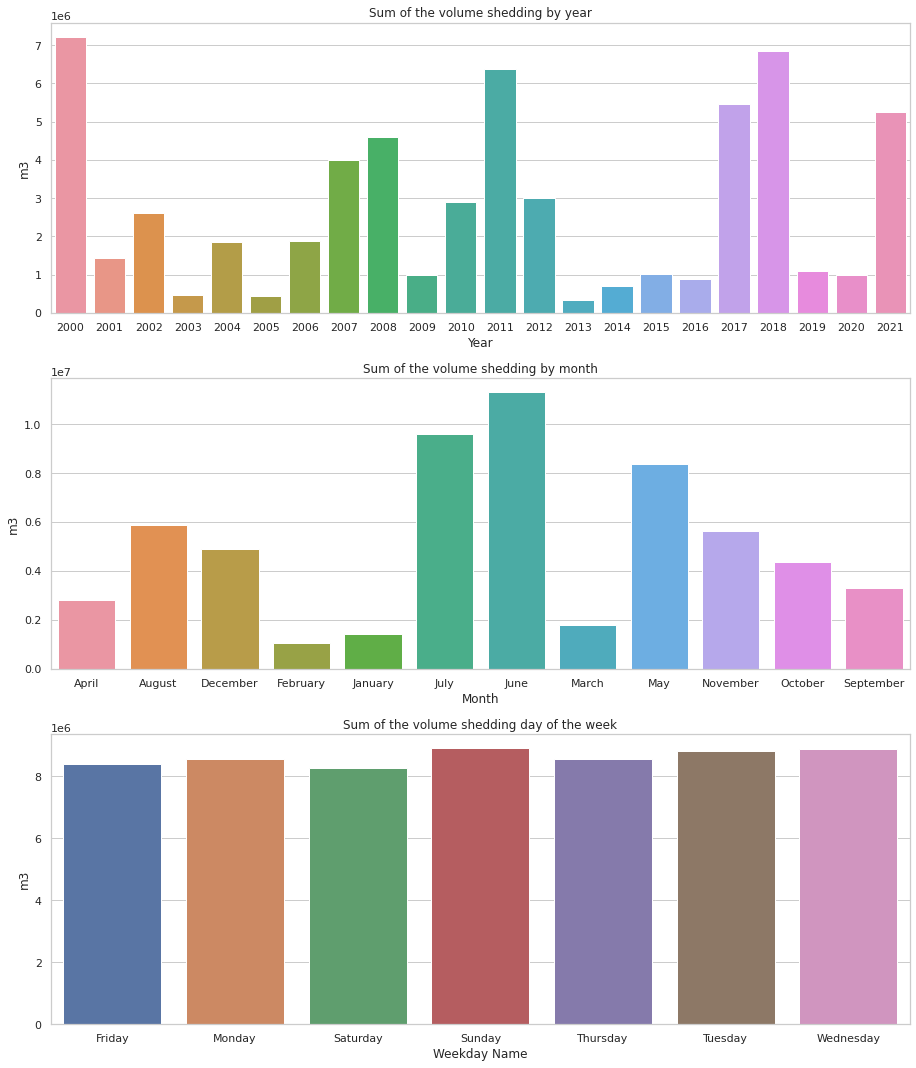

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Vertimientos Volumen miles m3', data = df_y_v)
plt.ylabel("m3")
plt.title("Sum of the volume shedding by year")

plt.subplot(323)
sns.barplot(x="Month", y='Vertimientos Volumen miles m3', data = df_m_v)
plt.ylabel("m3")
plt.title("Sum of the volume shedding by month")
plt.tight_layout()

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Vertimientos Volumen miles m3', data = df_d_v)
plt.ylabel("m3")
plt.title("Sum of the volume shedding day of the week")

plt.tight_layout()

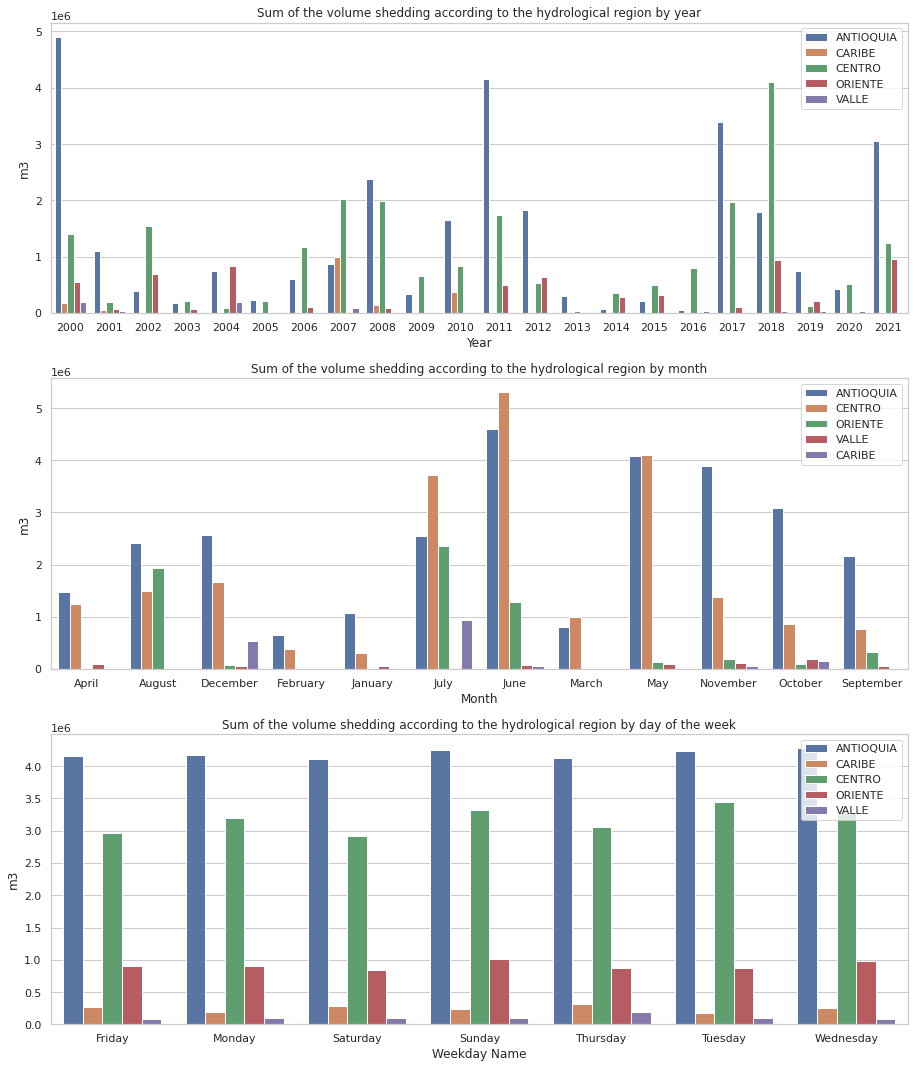

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Vertimientos Volumen miles m3', hue='Region Hidrologica', data = y_rg_y_v)
plt.ylabel("m3")
plt.title("Sum of the volume shedding according to the hydrological region by year")
plt.legend(loc = 'upper right')

plt.subplot(323)
sns.barplot(x="Month", y='Vertimientos Volumen miles m3',hue='Region Hidrologica', data = y_rg_m_v)
plt.ylabel("m3")
plt.title("Sum of the volume shedding according to the hydrological region by month")
plt.legend(loc = 'upper right')

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Vertimientos Volumen miles m3',hue='Region Hidrologica', data = y_rg_d_v)
plt.ylabel("m3")
plt.title("Sum of the volume shedding according to the hydrological region by day of the week")
plt.legend(loc = 'upper right')

plt.tight_layout()

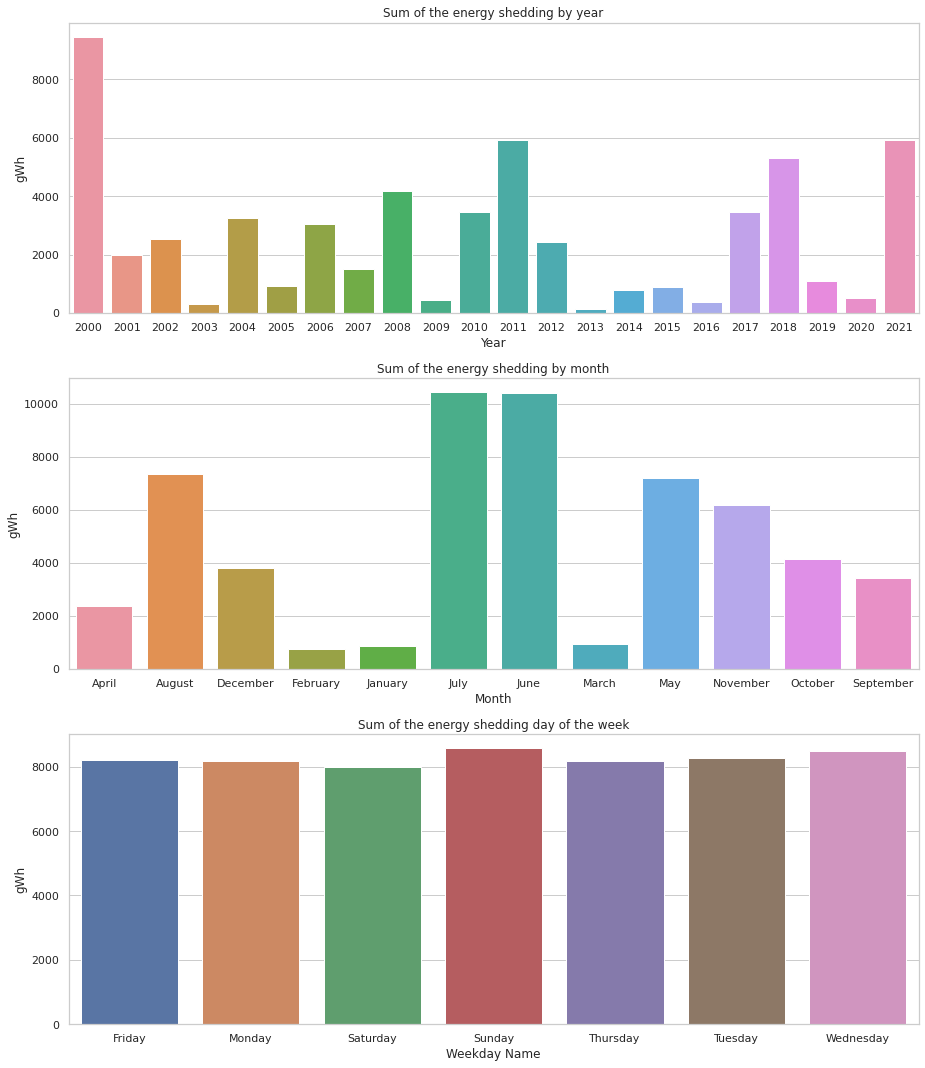

In [35]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Vertimiento Energía gWh', data = df_y_v)
plt.ylabel("gWh")
plt.title("Sum of the energy shedding by year")

plt.subplot(323)
sns.barplot(x="Month", y='Vertimiento Energía gWh', data = df_m_v)
plt.ylabel("gWh")
plt.title("Sum of the energy shedding by month")
plt.tight_layout()

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Vertimiento Energía gWh', data = df_d_v)
plt.ylabel("gWh")
plt.title("Sum of the energy shedding day of the week")

plt.tight_layout()

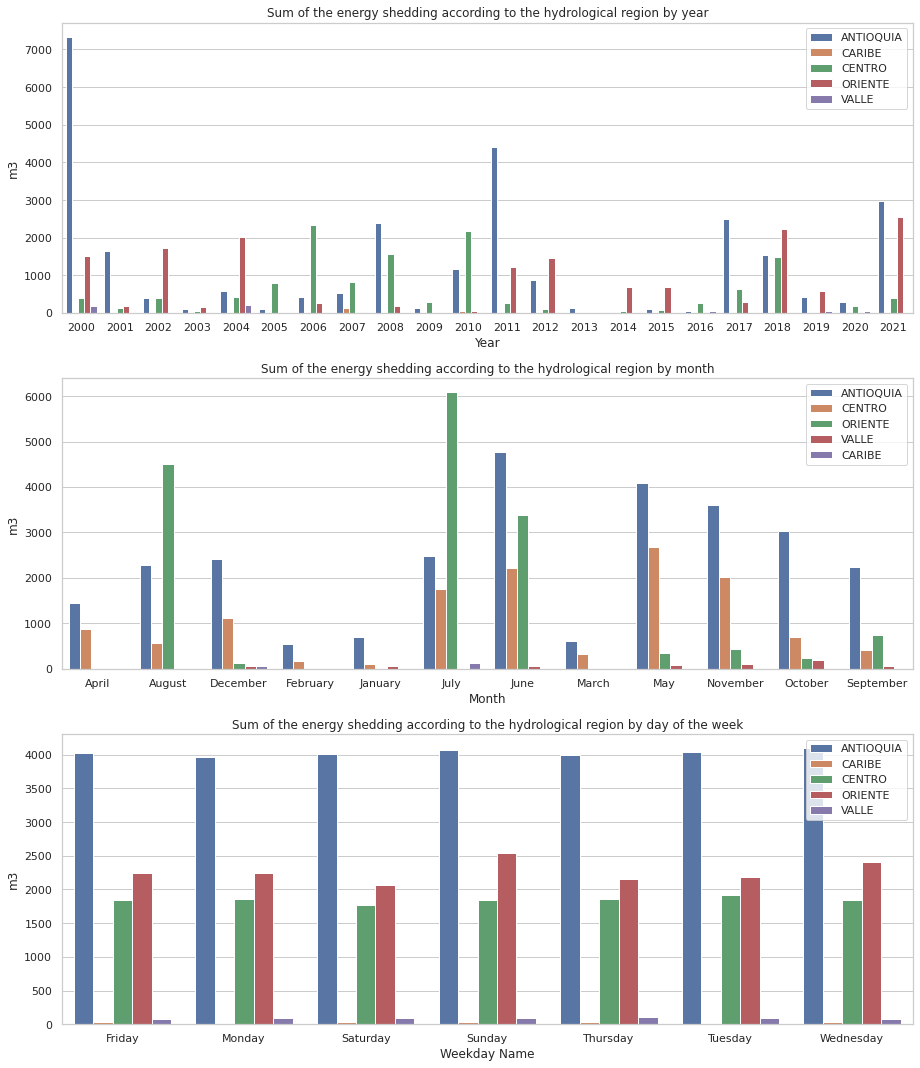

In [36]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Vertimiento Energía gWh', hue='Region Hidrologica', data = y_rg_y_v)
plt.ylabel("m3")
plt.title("Sum of the energy shedding according to the hydrological region by year")
plt.legend(loc = 'upper right')

plt.subplot(323)
sns.barplot(x="Month", y='Vertimiento Energía gWh',hue='Region Hidrologica', data = y_rg_m_v)
plt.ylabel("m3")
plt.title("Sum of the energy shedding according to the hydrological region by month")
plt.legend(loc = 'upper right')

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Vertimiento Energía gWh',hue='Region Hidrologica', data = y_rg_d_v)
plt.ylabel("m3")
plt.title("Sum of the energy shedding according to the hydrological region by day of the week")
plt.legend(loc = 'upper right')

plt.tight_layout()

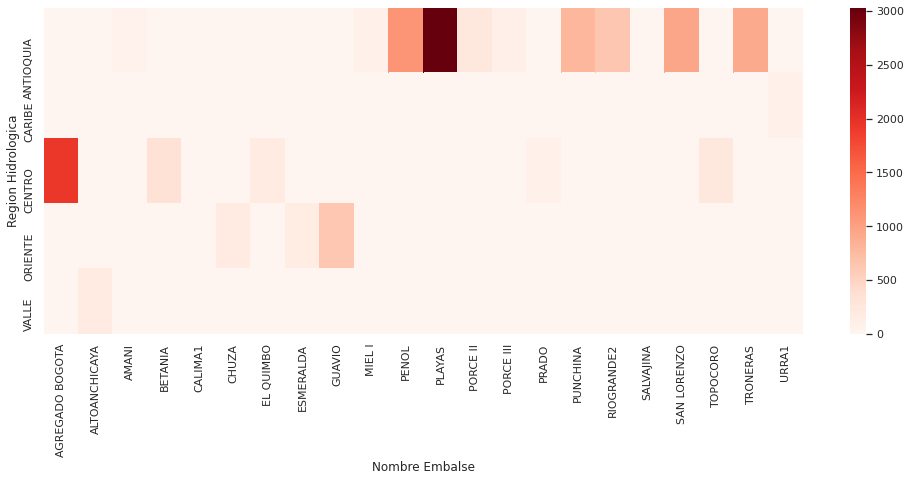

In [37]:
# tabla de contingencia entre la region hidrologica y los rios
my_contingency_table = pd.crosstab(index=df_vert['Region Hidrologica'], columns=df_vert['Nombre Embalse'])
plt.subplots(figsize=(17,6))
sns.heatmap(my_contingency_table, cmap="Reds")

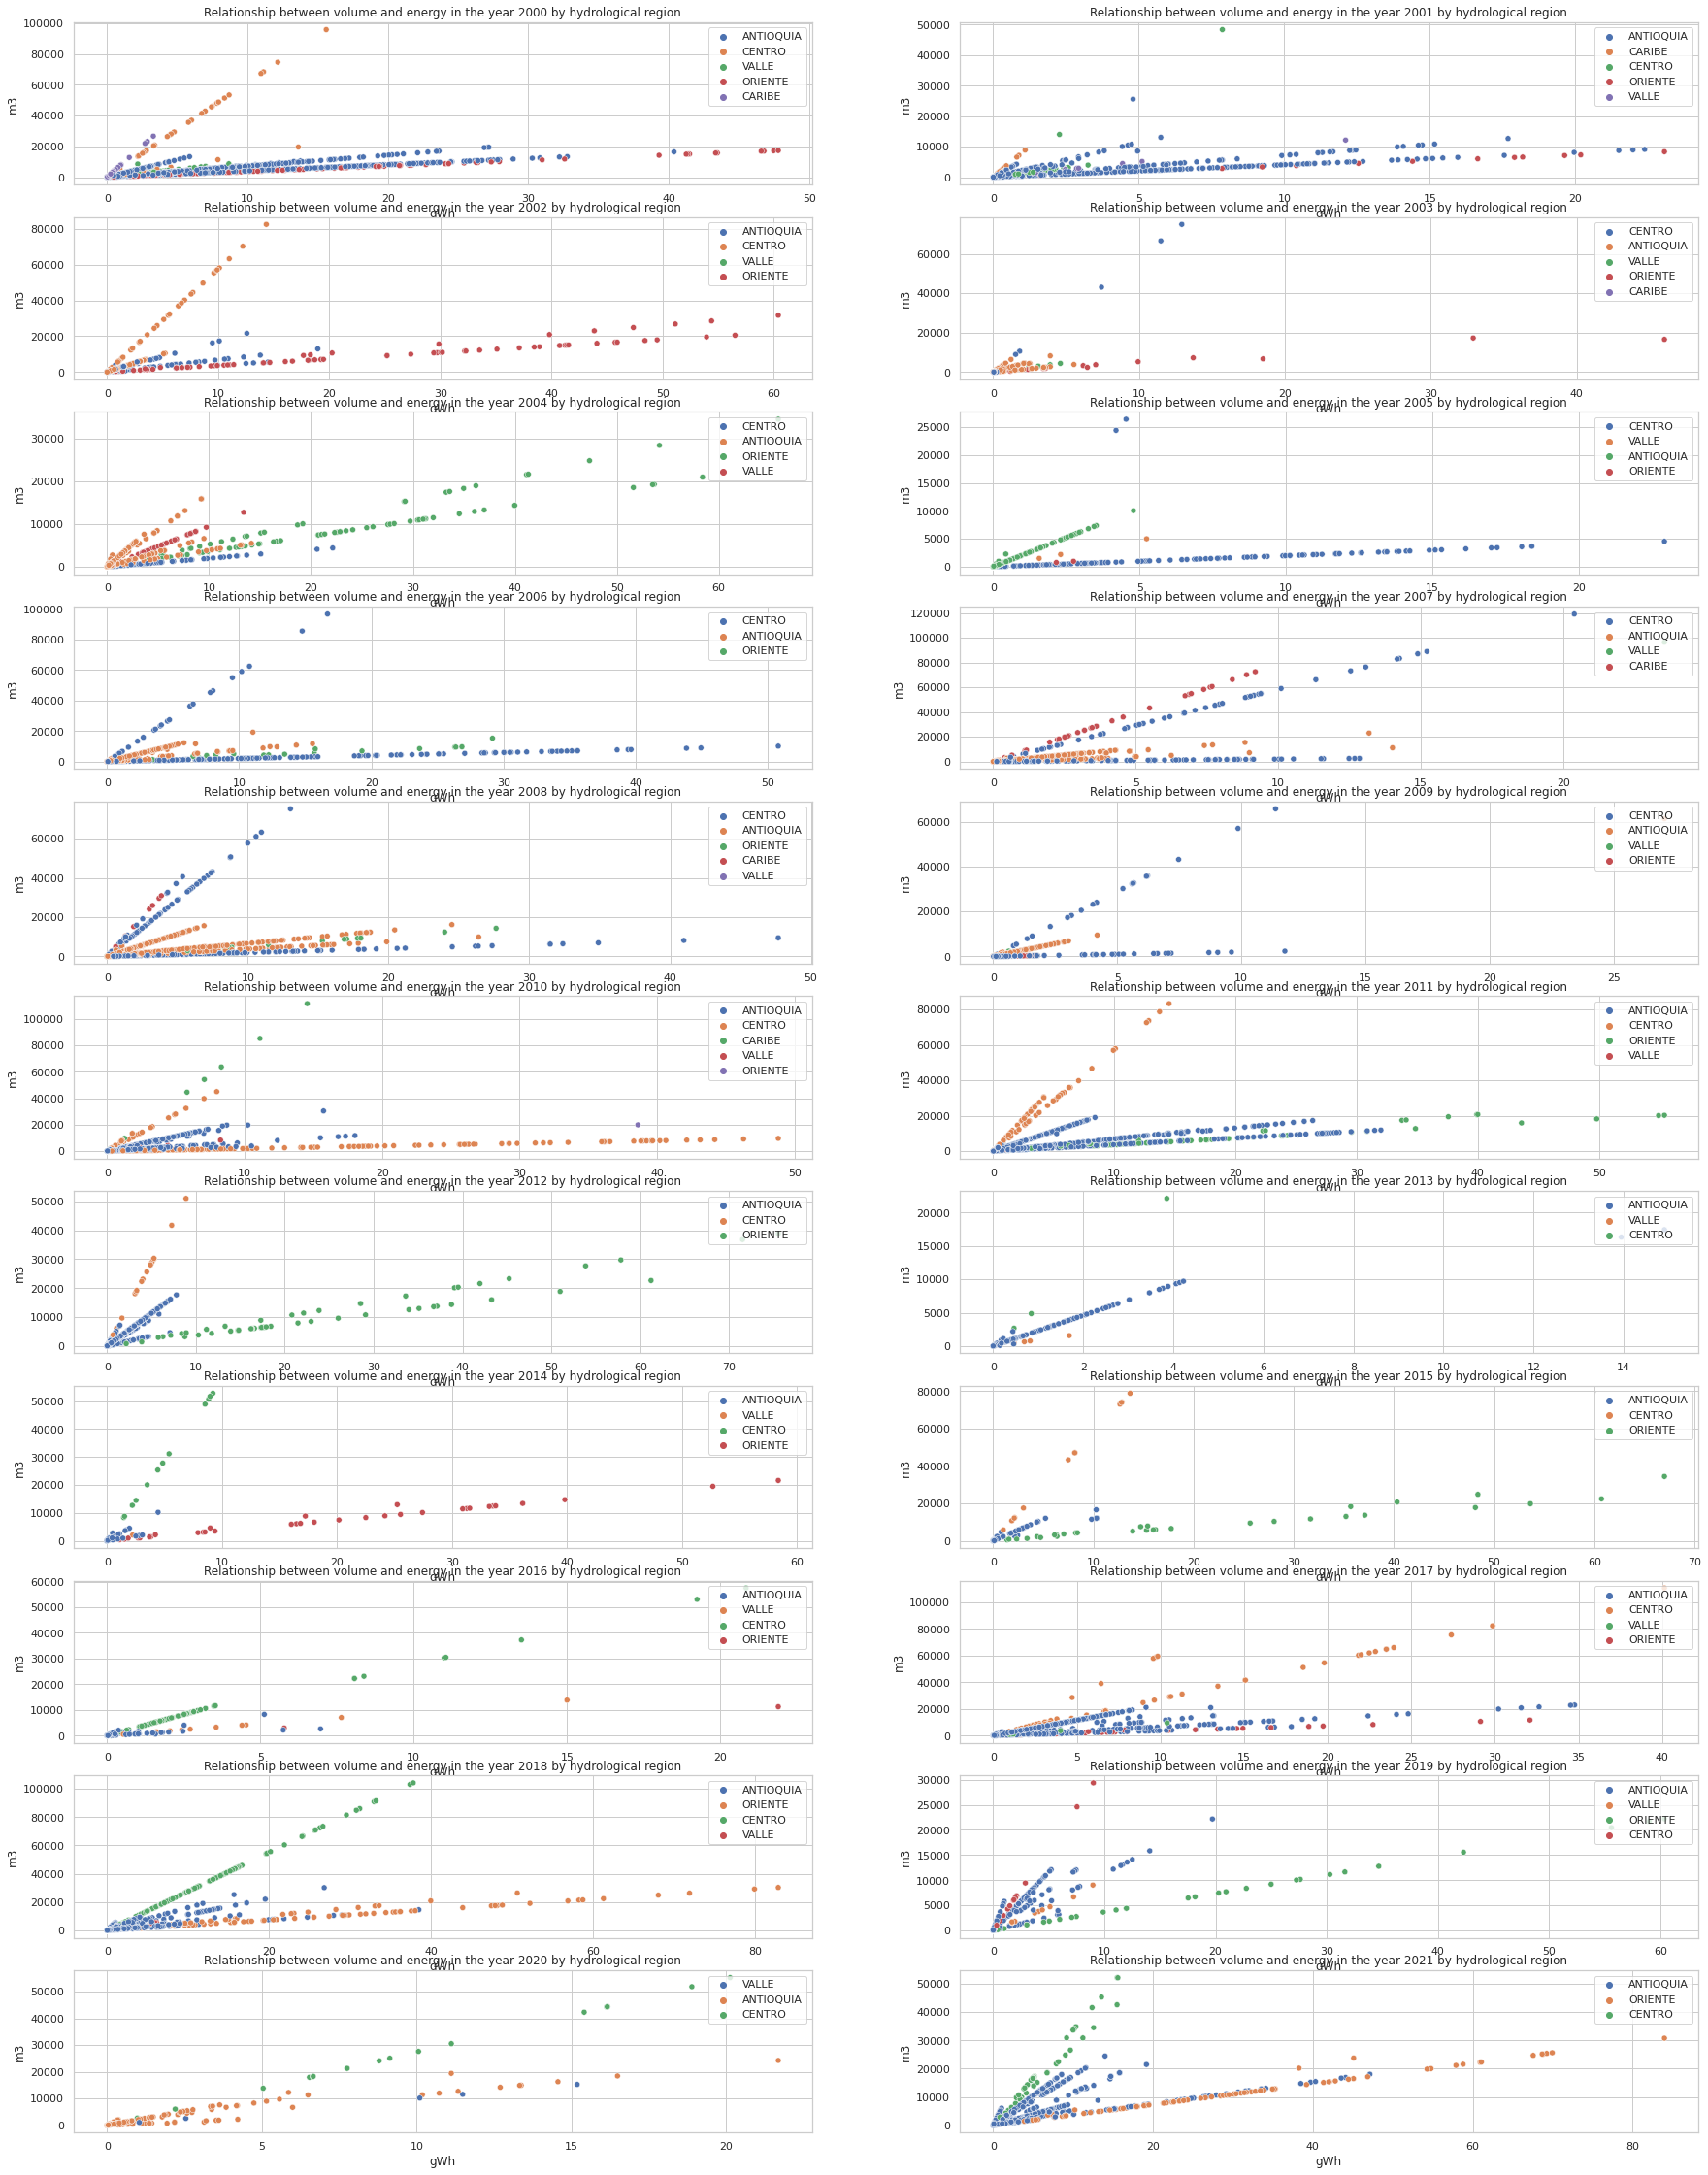

In [38]:
plt.figure(figsize=(30,40))
for i,var in enumerate(list(set(df_vert['Year']))):
    plt.subplot(11,2,i+1)
    df_temp = df_vert[df_vert['Year']==var]
    sns.scatterplot(x='Vertimiento Energía gWh', y='Vertimientos Volumen miles m3',hue='Region Hidrologica', data=df_temp)
    plt.xlabel("gWh")
    plt.ylabel("m3")
    plt.title("Relationship between volume and energy in the year " + str(var) + " by hydrological region")
    plt.legend(loc = 'upper right')

In [39]:
df_temp_2=df_vert.groupby(["Fecha"]).sum().reset_index()

Text(0.5, 1.0, 'Time serie of the energy shedding')

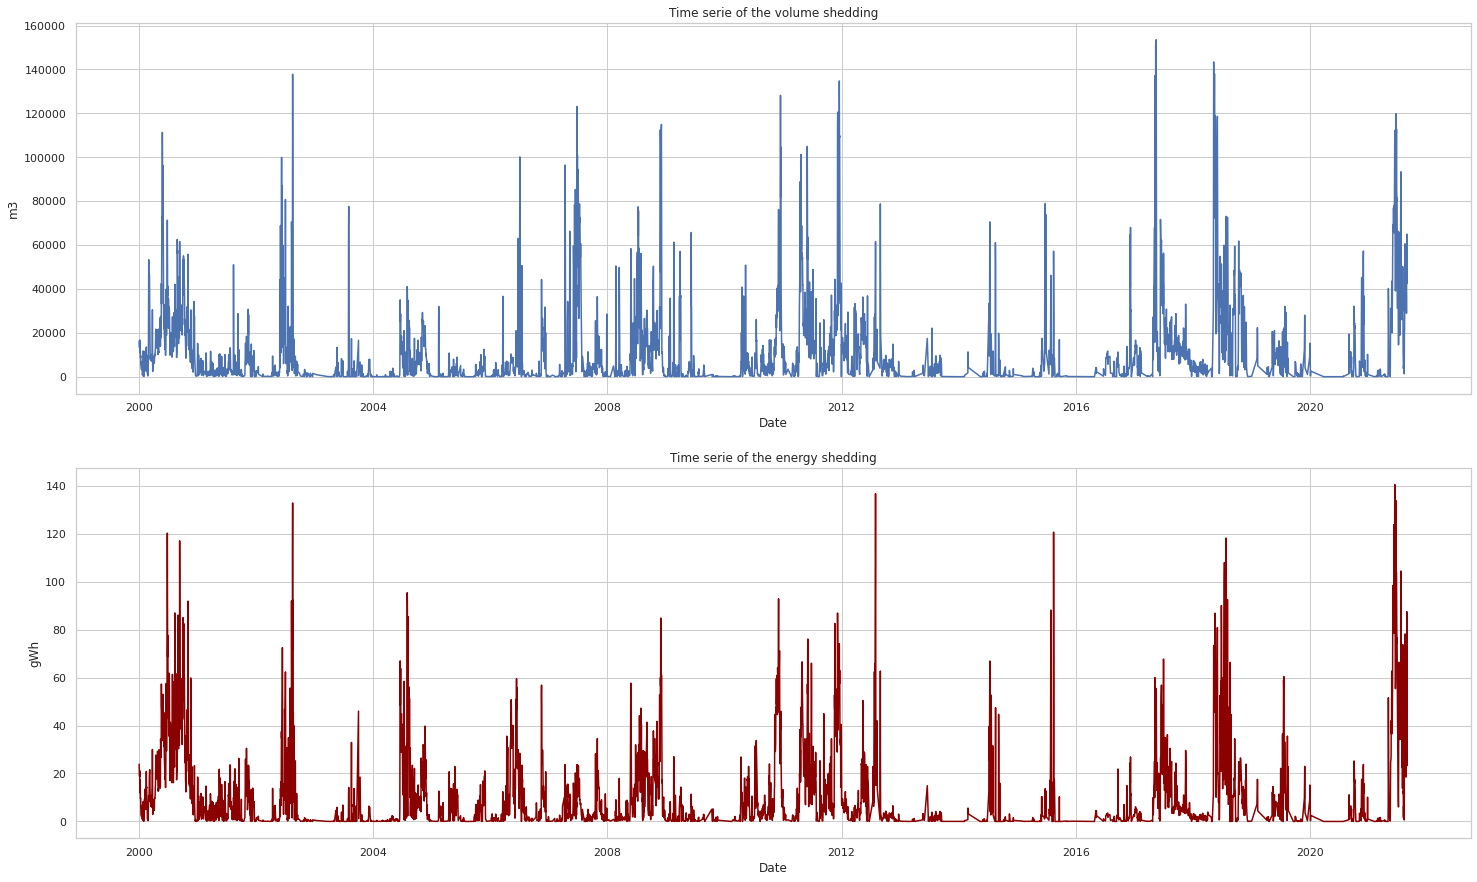

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(211)
sns.lineplot(x="Fecha", y="Vertimientos Volumen miles m3", data=df_temp_2)
plt.xlabel("Date")
plt.ylabel("m3")
plt.title("Time serie of the volume shedding")

plt.subplot(212)
sns.lineplot(x="Fecha", y='Vertimiento Energía gWh', data=df_temp_2,color="darkred")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy shedding")

In [41]:
#df_vert_temp=df_by_day_vv.set_index('Fecha', inplace = True) 
#df_vert_temp
#df_by_day_vv.head(5)
df_Valle = df_by_day_vv[df_by_day_vv['Region Hidrologica'] == 'VALLE']
df_Centro = df_by_day_vv[df_by_day_vv['Region Hidrologica'] == 'CENTRO']
df_Oriente = df_by_day_vv[df_by_day_vv['Region Hidrologica'] == 'ORIENTE']
df_Caribe = df_by_day_vv[df_by_day_vv['Region Hidrologica'] == 'CARIBE']
df_Antioquia = df_by_day_vv[df_by_day_vv['Region Hidrologica'] == 'ANTIOQUIA']

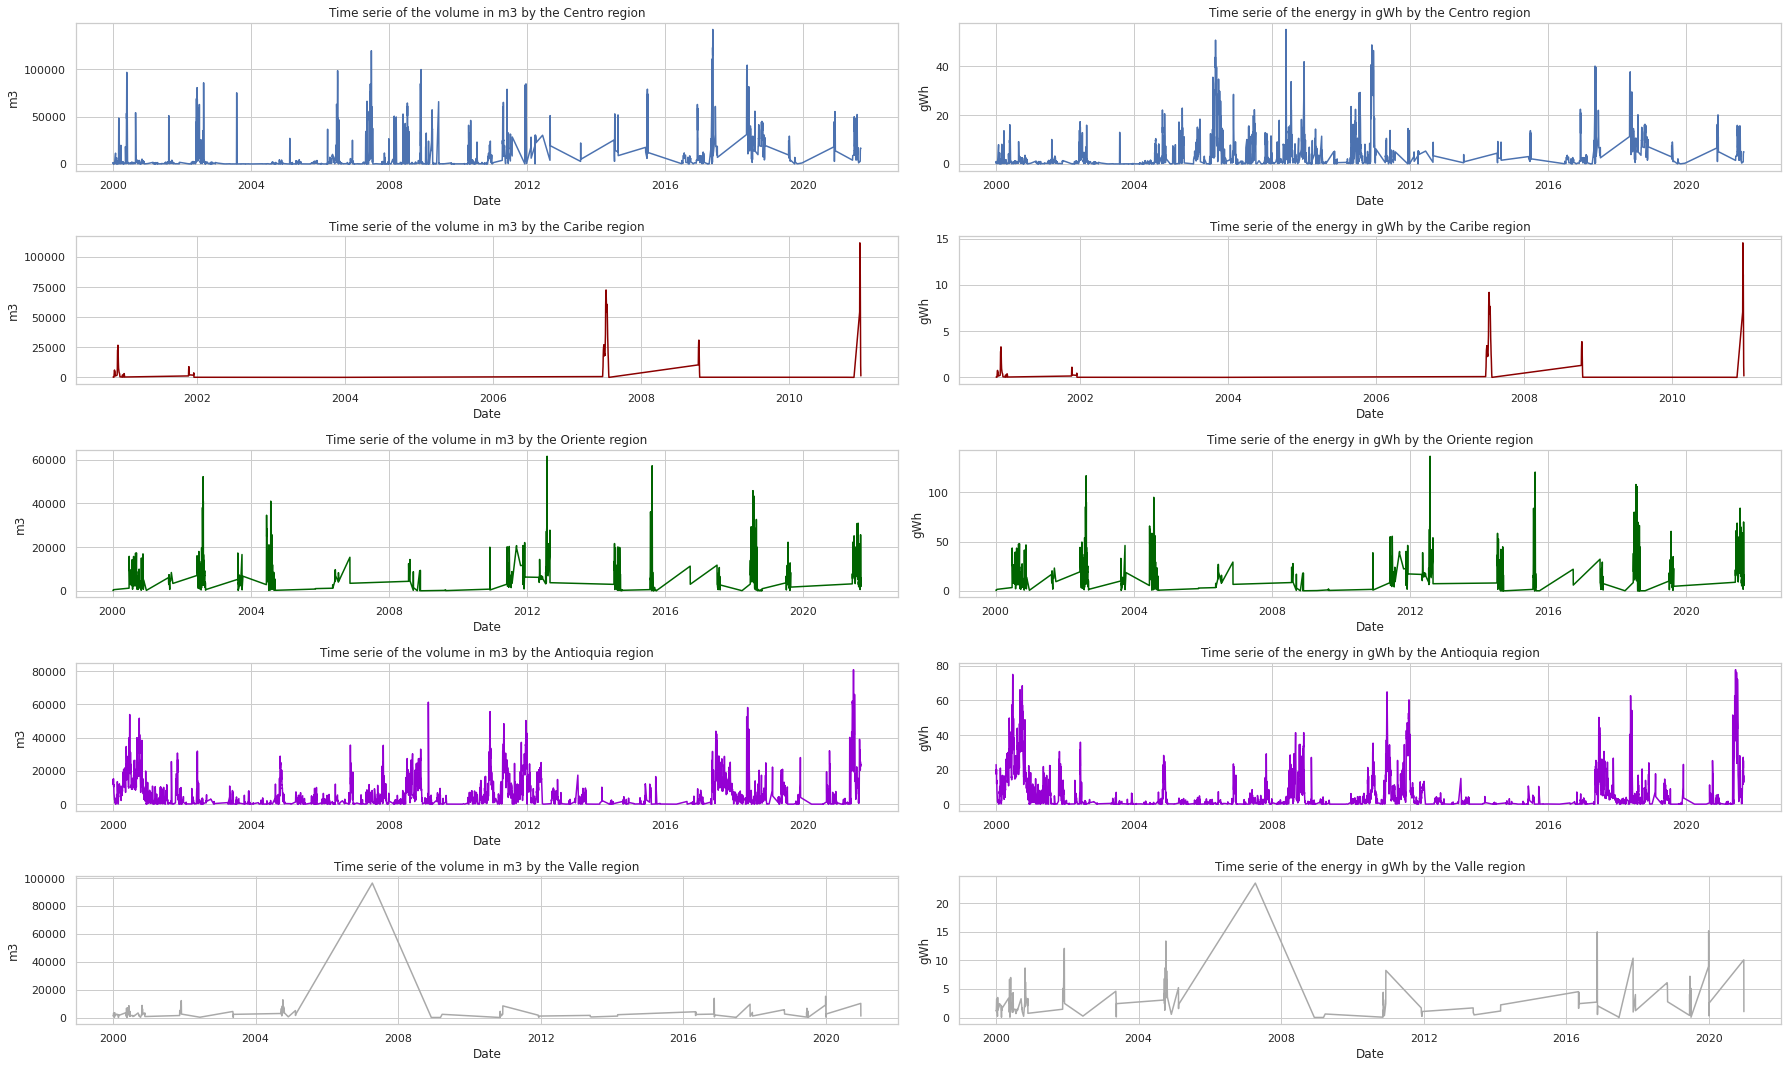

In [42]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(521)
sns.lineplot(x="Fecha", y="Vertimientos Volumen miles m3", data=df_Centro)
plt.xlabel("Date")
plt.ylabel("m3")
plt.title("Time serie of the volume in m3 by the Centro region")

plt.subplot(522)
sns.lineplot(x="Fecha", y='Vertimiento Energía gWh', data=df_Centro)
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in gWh by the Centro region")

plt.subplot(523)
sns.lineplot(x="Fecha", y="Vertimientos Volumen miles m3", data=df_Caribe,color="darkred")
plt.xlabel("Date")
plt.ylabel("m3")
plt.title("Time serie of the volume in m3 by the Caribe region")

plt.subplot(524)
sns.lineplot(x="Fecha", y='Vertimiento Energía gWh', data=df_Caribe,color="darkred")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in gWh by the Caribe region")

plt.subplot(525)
sns.lineplot(x="Fecha", y="Vertimientos Volumen miles m3", data=df_Oriente,color="darkgreen")
plt.xlabel("Date")
plt.ylabel("m3")
plt.title("Time serie of the volume in m3 by the Oriente region")

plt.subplot(526)
sns.lineplot(x="Fecha", y='Vertimiento Energía gWh', data=df_Oriente,color="darkgreen")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in gWh by the Oriente region")

plt.subplot(527)
sns.lineplot(x="Fecha", y="Vertimientos Volumen miles m3", data=df_Antioquia, color="darkviolet")
plt.xlabel("Date")
plt.ylabel("m3")
plt.title("Time serie of the volume in m3 by the Antioquia region")

plt.subplot(528)
sns.lineplot(x="Fecha", y='Vertimiento Energía gWh', data=df_Antioquia,color="darkviolet")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in gWh by the Antioquia region")

plt.subplot(529)
sns.lineplot(x="Fecha", y="Vertimientos Volumen miles m3", data=df_Valle, color='darkgray' )
plt.xlabel("Date")
plt.ylabel("m3")
plt.title("Time serie of the volume in m3 by the Valle region")

plt.subplot(5,2,10)
sns.lineplot(x="Fecha", y='Vertimiento Energía gWh', data=df_Valle,color='darkgray')
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in gWh by the Valle region")

plt.tight_layout()

In [43]:
df_vert.loc[:,["Vertimientos Volumen miles m3",'Vertimiento Energía gWh']].corr()

,Vertimientos Volumen miles m3,Vertimiento Energía gWh
Vertimientos Volumen miles m3,1.000000,0.446634
Vertimiento Energía gWh,0.446634,1.000000
